In [2]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from pandas import DataFrame, read_csv
import pandas as pd
import arrow
import seaborn as sns
%matplotlib inline

In [9]:
train = read_csv('data/train.csv')
train['hour'] = train.datetime.apply(lambda dt: arrow.get(dt).hour)
train['day'] = train.datetime.apply(lambda dt: arrow.get(dt).day)
print(train.head(10))
# print(train.dtypes)

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  hour  day  
0        81     0.0000       3          13     16     0    1  
1   

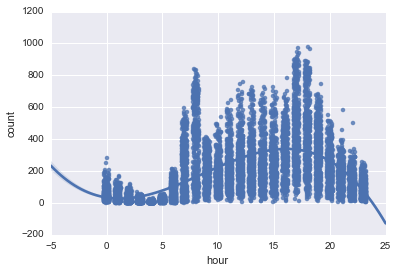

In [4]:
sns.regplot(x="hour", y="count", data=train, x_jitter=0.25, order=3)

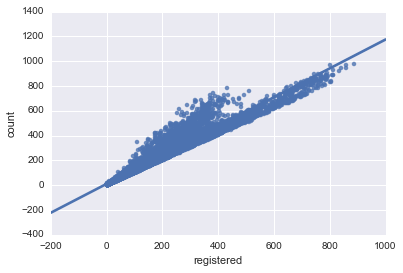

In [5]:
sns.regplot(x="registered", y="count", data=train)

In [10]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

xtrain0 = train[['season', 'hour', 'holiday', 'workingday', 'humidity', 'windspeed', 'weather', 'temp']]
ytrain = train['count']
mapper = DataFrameMapper([('season', LabelBinarizer()),
                          ('hour', LabelBinarizer()),
                          ('holiday', LabelBinarizer()),
                          ('workingday', LabelBinarizer()),
                          ('humidity', StandardScaler()),
                          ('windspeed', StandardScaler()),
                          ('weather', LabelBinarizer()),
                          ('temp', StandardScaler())])
xtrain1 = mapper.fit_transform(xtrain0)
model = LinearRegression()
model.fit(xtrain1, ytrain)
print(model)
print(model.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  1.13629937e+13   1.13629937e+13   1.13629937e+13   1.13629937e+13
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
   4.61485450e+12   4.61485450e+12   4.61485450e+12   4.61485450e+12
  -6.95367968e+00   1.07551588e+00  -1.83050617e+01  -6.31882583e+00
   1.03520437e+15   1.03520437e+15   1.03520437e+15   1.03520437e+15
   5.15285956e+01]


/Users/evanzamir/.virtualenvs/sklearn/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [11]:
model.score(xtrain1, ytrain)

0.63200973363836677

In [12]:
test = read_csv('data/test.csv')
test['hour'] = test.datetime.apply(lambda dt: arrow.get(dt).hour)
test['day'] = test.datetime.apply(lambda dt: arrow.get(dt).day)
print(test.head(10))

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   
5  2011-01-20 05:00:00       1        0           1        1   9.84  11.365   
6  2011-01-20 06:00:00       1        0           1        1   9.02  10.605   
7  2011-01-20 07:00:00       1        0           1        1   9.02  10.605   
8  2011-01-20 08:00:00       1        0           1        1   9.02  10.605   
9  2011-01-20 09:00:00       1        0           1        2   9.84  11.365   

   humidity  windspeed  hour  day  
0        56    26.0027     0   20  
1        56     0.0000     1   20  
2        56     0.0000

In [26]:
xtest0 = test[['season', 'hour', 'holiday', 'workingday', 'humidity', 'windspeed', 'weather', 'temp']]
mapper = DataFrameMapper([('season', LabelBinarizer()),
                          ('hour', LabelBinarizer()),
                          ('holiday', LabelBinarizer()),
                          ('workingday', LabelBinarizer()),
                          ('humidity', StandardScaler()),
                          ('windspeed', StandardScaler()),
                          ('weather', LabelBinarizer()),
                          ('temp', StandardScaler())])
xtest1 = mapper.fit_transform(xtest0)
ytest = model.predict(xtest1)
submit = DataFrame({'dt':test['datetime'], 'count':ytest})
submit.to_csv('predicted.csv')